# Based on the Data set predict person is suffering from heart disease or not

### Importing Libraries & Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("D:\corona\heart_Disease\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# There are no NULL values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Feature engineering

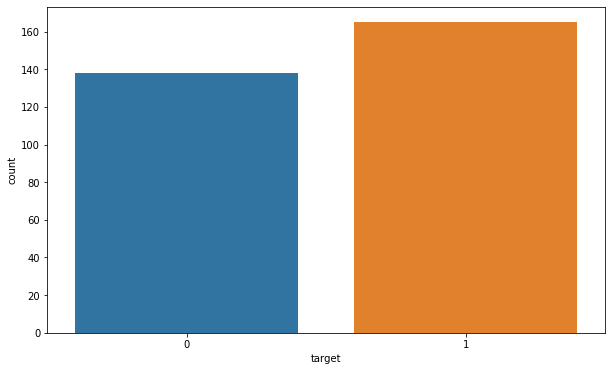

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(data['target'])

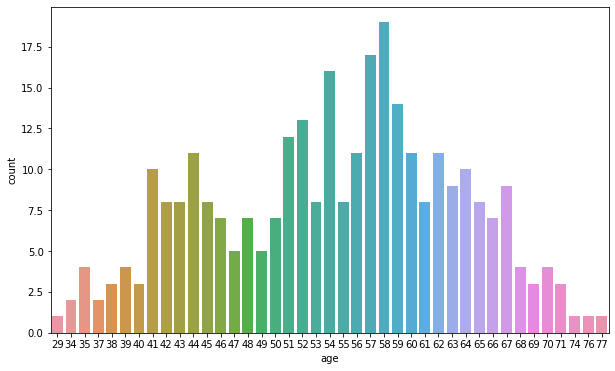

In [6]:
# Creating count polt based on the age

plt.figure(figsize=(10,6))
sns.countplot(data['age'])

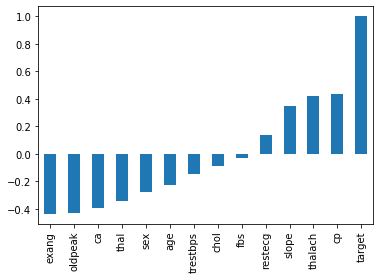

In [7]:
# This will show you the co-orelation between features respect to our target val

data.corr()['target'].sort_values().plot(kind='bar')

(15, 0)

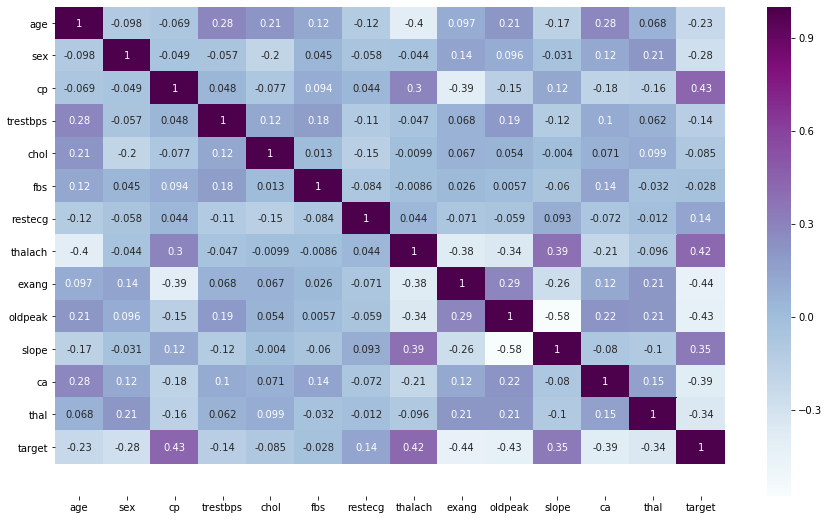

In [8]:
# Correlation of each feature in our dataset

features_correlation = data.corr()
top_features = features_correlation.index
plt.figure(figsize=(15,9))
sns.heatmap(data[top_features].corr(),annot=True,cmap='BuPu')
plt.ylim(15,0)

### Spliting Data into Training & Testing Data

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1).values
y = data['target'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(7,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = "binary_crossentropy",optimizer='adam')

model.fit(x = X_train, y = y_train, epochs=1000, validation_data=(X_test,y_test))

Train on 242 samples, validate on 61 samples
Epoch 1/1000
242/242 [==============================] - 1s 3ms/sample - loss: 0.6994 - val_loss: 0.7076
Epoch 2/1000
242/242 [==============================] - 0s 123us/sample - loss: 0.6858 - val_loss: 0.6974
Epoch 3/1000
242/242 [==============================] - 0s 124us/sample - loss: 0.6745 - val_loss: 0.6853
Epoch 4/1000
242/242 [==============================] - 0s 128us/sample - loss: 0.6634 - val_loss: 0.6747
Epoch 5/1000
242/242 [==============================] - 0s 140us/sample - loss: 0.6521 - val_loss: 0.6597
Epoch 6/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.6379 - val_loss: 0.6384
Epoch 7/1000
242/242 [==============================] - 0s 124us/sample - loss: 0.6205 - val_loss: 0.6151
Epoch 8/1000
242/242 [==============================] - 0s 148us/sample - loss: 0.6016 - val_loss: 0.5947
Epoch 9/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.5811 - val_loss: 0.5738
Epo

242/242 [==============================] - 0s 107us/sample - loss: 0.3018 - val_loss: 0.3011
Epoch 78/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.2996 - val_loss: 0.3008
Epoch 79/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.2982 - val_loss: 0.3041
Epoch 80/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.2971 - val_loss: 0.3177
Epoch 81/1000
242/242 [==============================] - 0s 99us/sample - loss: 0.2960 - val_loss: 0.3158
Epoch 82/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.2932 - val_loss: 0.2970
Epoch 83/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.2924 - val_loss: 0.3143
Epoch 84/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.2898 - val_loss: 0.3181
Epoch 85/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.2879 - val_loss: 0.3063
Epoch 86/1000
242/242 [=============================

242/242 [==============================] - 0s 115us/sample - loss: 0.2182 - val_loss: 0.3749
Epoch 154/1000
242/242 [==============================] - 0s 115us/sample - loss: 0.2159 - val_loss: 0.3598
Epoch 155/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.2176 - val_loss: 0.3290
Epoch 156/1000
242/242 [==============================] - 0s 99us/sample - loss: 0.2114 - val_loss: 0.3936
Epoch 157/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.2152 - val_loss: 0.3634
Epoch 158/1000
242/242 [==============================] - 0s 99us/sample - loss: 0.2132 - val_loss: 0.3636
Epoch 159/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.2092 - val_loss: 0.3697
Epoch 160/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.2081 - val_loss: 0.3731
Epoch 161/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.2090 - val_loss: 0.3601
Epoch 162/1000
242/242 [=====================

242/242 [==============================] - 0s 157us/sample - loss: 0.1686 - val_loss: 0.5147
Epoch 230/1000
242/242 [==============================] - 0s 152us/sample - loss: 0.1618 - val_loss: 0.4258
Epoch 231/1000
242/242 [==============================] - 0s 148us/sample - loss: 0.1605 - val_loss: 0.4677
Epoch 232/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.1619 - val_loss: 0.4801
Epoch 233/1000
242/242 [==============================] - 0s 132us/sample - loss: 0.1572 - val_loss: 0.4436
Epoch 234/1000
242/242 [==============================] - 0s 124us/sample - loss: 0.1587 - val_loss: 0.4690
Epoch 235/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.1597 - val_loss: 0.4768
Epoch 236/1000
242/242 [==============================] - 0s 120us/sample - loss: 0.1597 - val_loss: 0.4584
Epoch 237/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.1554 - val_loss: 0.4812
Epoch 238/1000
242/242 [===================

242/242 [==============================] - 0s 120us/sample - loss: 0.1246 - val_loss: 0.5358
Epoch 306/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.1316 - val_loss: 0.6523
Epoch 307/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.1246 - val_loss: 0.5732
Epoch 308/1000
242/242 [==============================] - 0s 95us/sample - loss: 0.1239 - val_loss: 0.6232
Epoch 309/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.1293 - val_loss: 0.6305
Epoch 310/1000
242/242 [==============================] - 0s 99us/sample - loss: 0.1452 - val_loss: 0.5716
Epoch 311/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.1297 - val_loss: 0.6808
Epoch 312/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.1234 - val_loss: 0.5556
Epoch 313/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.1225 - val_loss: 0.6363
Epoch 314/1000
242/242 [=====================

242/242 [==============================] - 0s 132us/sample - loss: 0.0990 - val_loss: 0.6993
Epoch 382/1000
242/242 [==============================] - 0s 128us/sample - loss: 0.0975 - val_loss: 0.8088
Epoch 383/1000
242/242 [==============================] - 0s 99us/sample - loss: 0.1033 - val_loss: 0.6867
Epoch 384/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0985 - val_loss: 0.7763
Epoch 385/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.0955 - val_loss: 0.7085
Epoch 386/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.0997 - val_loss: 0.7518
Epoch 387/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.1017 - val_loss: 0.8027
Epoch 388/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.0929 - val_loss: 0.6834
Epoch 389/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0979 - val_loss: 0.7857
Epoch 390/1000
242/242 [====================

242/242 [==============================] - 0s 115us/sample - loss: 0.0819 - val_loss: 0.8751
Epoch 458/1000
242/242 [==============================] - 0s 99us/sample - loss: 0.0776 - val_loss: 0.8896
Epoch 459/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.0750 - val_loss: 0.8782
Epoch 460/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0743 - val_loss: 0.9138
Epoch 461/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.0731 - val_loss: 0.8833
Epoch 462/1000
242/242 [==============================] - 0s 115us/sample - loss: 0.0724 - val_loss: 0.8979
Epoch 463/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0726 - val_loss: 0.8878
Epoch 464/1000
242/242 [==============================] - 0s 99us/sample - loss: 0.0714 - val_loss: 0.8932
Epoch 465/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0725 - val_loss: 0.9006
Epoch 466/1000
242/242 [=====================

242/242 [==============================] - 0s 107us/sample - loss: 0.0602 - val_loss: 1.0652
Epoch 534/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0584 - val_loss: 1.0674
Epoch 535/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0595 - val_loss: 1.0496
Epoch 536/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0555 - val_loss: 1.0479
Epoch 537/1000
242/242 [==============================] - 0s 99us/sample - loss: 0.0508 - val_loss: 1.1194
Epoch 538/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0502 - val_loss: 1.0547
Epoch 539/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.0511 - val_loss: 1.0886
Epoch 540/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0504 - val_loss: 1.1034
Epoch 541/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0522 - val_loss: 1.1088
Epoch 542/1000
242/242 [====================

242/242 [==============================] - 0s 115us/sample - loss: 0.0363 - val_loss: 1.2865
Epoch 610/1000
242/242 [==============================] - 0s 120us/sample - loss: 0.0344 - val_loss: 1.2460
Epoch 611/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.0353 - val_loss: 1.3374
Epoch 612/1000
242/242 [==============================] - 0s 115us/sample - loss: 0.0379 - val_loss: 1.2991
Epoch 613/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0341 - val_loss: 1.2474
Epoch 614/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.0335 - val_loss: 1.2950
Epoch 615/1000
242/242 [==============================] - 0s 115us/sample - loss: 0.0332 - val_loss: 1.2645
Epoch 616/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0348 - val_loss: 1.2930
Epoch 617/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.0352 - val_loss: 1.2372
Epoch 618/1000
242/242 [===================

Epoch 685/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0232 - val_loss: 1.4528
Epoch 686/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.0224 - val_loss: 1.4947
Epoch 687/1000
242/242 [==============================] - 0s 115us/sample - loss: 0.0221 - val_loss: 1.4323
Epoch 688/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0223 - val_loss: 1.4744
Epoch 689/1000
242/242 [==============================] - 0s 128us/sample - loss: 0.0223 - val_loss: 1.4639
Epoch 690/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0220 - val_loss: 1.4473
Epoch 691/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0213 - val_loss: 1.4865
Epoch 692/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0237 - val_loss: 1.4146
Epoch 693/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.0228 - val_loss: 1.4867
Epoch 694/1000
242/242 [====

242/242 [==============================] - 0s 140us/sample - loss: 0.0183 - val_loss: 1.6737
Epoch 761/1000
242/242 [==============================] - 0s 144us/sample - loss: 0.0157 - val_loss: 1.6748
Epoch 762/1000
242/242 [==============================] - 0s 136us/sample - loss: 0.0157 - val_loss: 1.6694
Epoch 763/1000
242/242 [==============================] - 0s 136us/sample - loss: 0.0147 - val_loss: 1.6663
Epoch 764/1000
242/242 [==============================] - 0s 144us/sample - loss: 0.0158 - val_loss: 1.6386
Epoch 765/1000
242/242 [==============================] - 0s 140us/sample - loss: 0.0155 - val_loss: 1.6779
Epoch 766/1000
242/242 [==============================] - 0s 120us/sample - loss: 0.0145 - val_loss: 1.6641
Epoch 767/1000
242/242 [==============================] - 0s 132us/sample - loss: 0.0153 - val_loss: 1.6859
Epoch 768/1000
242/242 [==============================] - 0s 124us/sample - loss: 0.0174 - val_loss: 1.6530
Epoch 769/1000
242/242 [===================

242/242 [==============================] - 0s 132us/sample - loss: 0.0105 - val_loss: 1.8385
Epoch 837/1000
242/242 [==============================] - 0s 120us/sample - loss: 0.0103 - val_loss: 1.8922
Epoch 838/1000
242/242 [==============================] - 0s 99us/sample - loss: 0.0105 - val_loss: 1.8381
Epoch 839/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0103 - val_loss: 1.8846
Epoch 840/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.0100 - val_loss: 1.8508
Epoch 841/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0094 - val_loss: 1.8753
Epoch 842/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0095 - val_loss: 1.8630
Epoch 843/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0095 - val_loss: 1.8749
Epoch 844/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0093 - val_loss: 1.8432
Epoch 845/1000
242/242 [====================

Epoch 912/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0061 - val_loss: 2.0361
Epoch 913/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0069 - val_loss: 2.1214
Epoch 914/1000
242/242 [==============================] - 0s 95us/sample - loss: 0.0066 - val_loss: 2.0941
Epoch 915/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0063 - val_loss: 2.1016
Epoch 916/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.0076 - val_loss: 2.1006
Epoch 917/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0070 - val_loss: 2.0662
Epoch 918/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0068 - val_loss: 2.1246
Epoch 919/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.0063 - val_loss: 2.0987
Epoch 920/1000
242/242 [==============================] - 0s 128us/sample - loss: 0.0066 - val_loss: 2.1121
Epoch 921/1000
242/242 [=====

242/242 [==============================] - 0s 115us/sample - loss: 0.0047 - val_loss: 2.2975
Epoch 988/1000
242/242 [==============================] - 0s 128us/sample - loss: 0.0066 - val_loss: 2.3563
Epoch 989/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0080 - val_loss: 2.2827
Epoch 990/1000
242/242 [==============================] - 0s 120us/sample - loss: 0.0082 - val_loss: 2.3689
Epoch 991/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0087 - val_loss: 2.3854
Epoch 992/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0085 - val_loss: 2.4350
Epoch 993/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.0077 - val_loss: 2.3168
Epoch 994/1000
242/242 [==============================] - 0s 132us/sample - loss: 0.0051 - val_loss: 2.3847
Epoch 995/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0041 - val_loss: 2.3451
Epoch 996/1000
242/242 [===================

In [13]:
# loss = Loss of my training set
# val_loss = Loss of my test set

losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.699368,0.707551
1,0.685762,0.697372
2,0.674481,0.685261
3,0.663356,0.674741
4,0.652130,0.659657
...,...,...
995,0.004013,2.372287
996,0.004108,2.374989
997,0.003907,2.365172
998,0.003823,2.346759


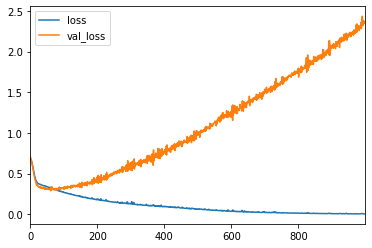

In [14]:
losses.plot()

In [15]:
# Stop automatically stop training data based of a loss condition on the validation data passed during the model.fit()

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25) # verbose = 1 : we will see bunch of output

model.fit(x = X_train, y = y_train, epochs=1000, validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 242 samples, validate on 61 samples
Epoch 1/1000
242/242 [==============================] - 0s 126us/sample - loss: 0.0040 - val_loss: 2.3580
Epoch 2/1000
242/242 [==============================] - 0s 136us/sample - loss: 0.0039 - val_loss: 2.3612
Epoch 3/1000
242/242 [==============================] - 0s 140us/sample - loss: 0.0038 - val_loss: 2.3329
Epoch 4/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0037 - val_loss: 2.3683
Epoch 5/1000
242/242 [==============================] - 0s 132us/sample - loss: 0.0039 - val_loss: 2.3644
Epoch 6/1000
242/242 [==============================] - 0s 120us/sample - loss: 0.0039 - val_loss: 2.4165
Epoch 7/1000
242/242 [==============================] - 0s 128us/sample - loss: 0.0045 - val_loss: 2.3593
Epoch 8/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.0036 - val_loss: 2.4315
Epoch 9/1000
242/242 [==============================] - 0s 140us/sample - loss: 0.0040 - val_loss: 2.3108
E

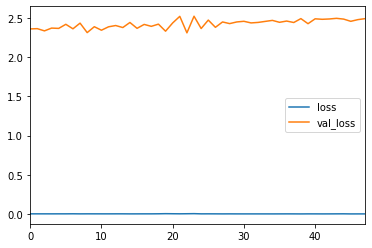

In [16]:
# loss = Loss of my training set
# val_loss = Loss of my test set

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [17]:
# Dropout help us to prevent overfitting


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model1 = Sequential()

model1.add(Dense(30,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(15,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(7,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1,activation='sigmoid'))

model1.compile(loss = "binary_crossentropy",optimizer='adam')

model1.fit(x = X_train, y = y_train, epochs=1000, validation_data=(X_test,y_test), callbacks=[early_stop])

Train on 242 samples, validate on 61 samples
Epoch 1/1000
242/242 [==============================] - 1s 3ms/sample - loss: 0.7429 - val_loss: 0.6826
Epoch 2/1000
242/242 [==============================] - 0s 139us/sample - loss: 0.6987 - val_loss: 0.6835
Epoch 3/1000
242/242 [==============================] - 0s 113us/sample - loss: 0.6840 - val_loss: 0.6834
Epoch 4/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.6890 - val_loss: 0.6822
Epoch 5/1000
242/242 [==============================] - 0s 132us/sample - loss: 0.6906 - val_loss: 0.6816
Epoch 6/1000
242/242 [==============================] - 0s 128us/sample - loss: 0.7363 - val_loss: 0.6818
Epoch 7/1000
242/242 [==============================] - 0s 120us/sample - loss: 0.6983 - val_loss: 0.6826
Epoch 8/1000
242/242 [==============================] - 0s 124us/sample - loss: 0.7008 - val_loss: 0.6823
Epoch 9/1000
242/242 [==============================] - 0s 128us/sample - loss: 0.6903 - val_loss: 0.6816
Epo

242/242 [==============================] - 0s 144us/sample - loss: 0.5208 - val_loss: 0.4311
Epoch 78/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.5373 - val_loss: 0.4306
Epoch 79/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.5059 - val_loss: 0.4224
Epoch 80/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.5496 - val_loss: 0.4161
Epoch 81/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.5413 - val_loss: 0.4170
Epoch 82/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.5334 - val_loss: 0.4173
Epoch 83/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.5256 - val_loss: 0.4164
Epoch 84/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.5229 - val_loss: 0.4127
Epoch 85/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.5296 - val_loss: 0.4074
Epoch 86/1000
242/242 [============================

242/242 [==============================] - 0s 136us/sample - loss: 0.4363 - val_loss: 0.3611
Epoch 154/1000
242/242 [==============================] - 0s 132us/sample - loss: 0.4384 - val_loss: 0.3582
Epoch 155/1000
242/242 [==============================] - 0s 111us/sample - loss: 0.4291 - val_loss: 0.3550
Epoch 156/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.4268 - val_loss: 0.3531
Epoch 157/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.4378 - val_loss: 0.3496
Epoch 158/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.4667 - val_loss: 0.3517
Epoch 159/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.4438 - val_loss: 0.3506
Epoch 160/1000
242/242 [==============================] - 0s 103us/sample - loss: 0.4436 - val_loss: 0.3523
Epoch 161/1000
242/242 [==============================] - 0s 107us/sample - loss: 0.4435 - val_loss: 0.3550
Epoch 162/1000
242/242 [===================

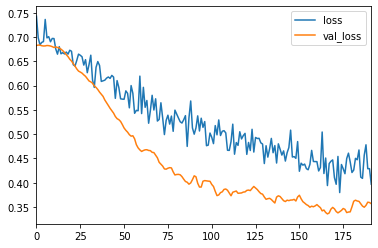

In [18]:
# loss = Loss of my training set
# val_loss = Loss of my test set

model1_loss = pd.DataFrame(model1.history.history)
model1_loss.plot()

In [19]:
# It will return our models loss

model1.evaluate(X_test,y_test,verbose=0)    # verbose = 0 : we will not see bunch of output  

0.3568796007359614

### Check Model Accuracy

In [20]:
pred = model1.predict_classes(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83        33
           1       0.75      0.96      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.85      0.84        61
weighted avg       0.86      0.84      0.84        61



In [22]:
print(confusion_matrix(y_test,pred))

[[24  9]
 [ 1 27]]


### This shows that our model is 86% accurate